In [1]:
import numpy as np
import sympy as sym
import json
import matplotlib.pyplot as plt
from scipy.signal import find_peaks
from scipy.interpolate import interp1d
import time
import matplotlib

In [2]:
def load_hardware_data(filename, t_min_offset=0, t_max_offset=0):
    # load raw data
    with open(filename, 'r') as f:
        data = json.load(f)

    # convert lists to numpy arrays
    for val in data.values():
        for key in val.keys():
            val[key] = np.array(val[key])

    # create an array of times at which to subsample
    t_min = -np.inf
    t_max = np.inf
    for key, val in data.items():
        t_min = max(t_min, val['time'][0])
        t_max = min(t_max, val['time'][-1])
    t_min += t_min_offset * 1000
    t_max -= t_max_offset * 1000
    nt = int(1 + np.floor((t_max - t_min) / 10.))
    t = np.arange(0, 10 * nt, 10) / 1000.
    resampled_data = {'time': t}

    # resample raw data with linear interpolation
    for k, v in data.items():
        f = interp1d((v['time'] - t_min) / 1000., v['data'])
        resampled_data[k] = f(t)
        
    # return the resampled data
    return resampled_data

In [3]:
data = load_hardware_data('../lorenz_data.json', t_min_offset=30)


In [4]:
t = data['time']

x = data['rk4solve.xn1']
y = data['rk4solve.xn2']
z = data['rk4solve.xn3']


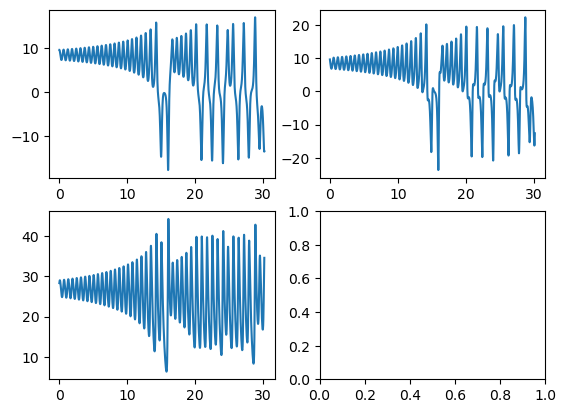

In [5]:
fig, ax1 = plt.subplots(2,2)

ax1[0][0].plot(t, x)
ax1[0][1].plot(t, y)
ax1[1][0].plot(t, z)
# ax=fig.add_subplot(projection='3d')
# ax.plot(x,y,z)


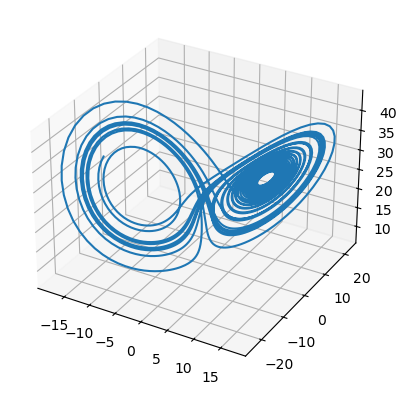

In [6]:
ax = plt.figure().add_subplot(projection='3d')
ax.plot(x,y,z)